In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import plotly.graph_objects as go

In [11]:
grad1= "data_files/grad_rates.xlsx"
sal1 = "data_files/teacher_salaries_1.xlsx"
sal2="data_files/gradvssal.csv"
grad2= "data_files/grad_rates.xlsx"
gradrate2=pd.read_excel(grad2, index_col="States")
salaries2=pd.read_csv(sal2, index_col="States")

In [5]:
gradrate=pd.read_excel(grad1)
salaries=pd.read_excel(sal1)
salaries.head()

,State,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,51142.0,52963.0,54354.0,55225.0,55586.0,55522.0,56065.0,56648,57611,58479,59539,60477
1,Alabama,43389.0,46604.0,46879.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518,50391,50568
2,Alaska,54679.0,56758.0,58395.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443,68769,69682
3,Arizona,44700.0,45772.0,46358.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218,47255,48723
4,Arkansas,45590.0,45238.0,45738.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218,48304,50544


In [8]:
salaries = salaries.rename(columns={'State':'States'})
salaries = salaries.drop(columns=['2007','2008','2009','2017','2018'])
salaries.head()

,States,2010,2011,2012,2013,2014,2015,2016
0,United States,55225.0,55586.0,55522.0,56065.0,56648,57611,58479
1,Alabama,47571.0,47803.0,48003.0,47949.0,48720,48611,48518
2,Alaska,60732.0,62918.0,62425.0,65468.0,65891,66755,67443
3,Arizona,46952.0,46637.0,45193.0,45264.0,45335,47456,47218
4,Arkansas,46045.0,45998.0,46314.0,46631.0,47319,47823,48218


In [9]:
salaries = salaries.rename(columns = {'2010':"Sal10",'2011':"Sal11",'2012':"Sal12",'2013':"Sal13",'2014':"Sal14",'2015':"Sal15",'2016':"Sal16"})
salaries= salaries.drop(salaries.index[0])
export_csv = salaries.to_csv (r'C:\Users\steel\Desktop\gradvssal.csv', index = None, header=True)

salaries.head()

,States,Sal10,Sal11,Sal12,Sal13,Sal14,Sal15,Sal16
1,Alabama,47571.0,47803.0,48003.000000,47949.0,48720,48611,48518
2,Alaska,60732.0,62918.0,62425.000000,65468.0,65891,66755,67443
3,Arizona,46952.0,46637.0,45193.000000,45264.0,45335,47456,47218
4,Arkansas,46045.0,45998.0,46314.000000,46631.0,47319,47823,48218
5,California,67932.0,67871.0,69755.344098,69435.0,71396,74090,77179


In [12]:
gradrate=gradrate.drop(gradrate.index[0])
gradrate.head()

,States,2010,2011,2012,2013,2014,2015,2016
1,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
2,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
3,Arizona,78.0,76.0,75.1,76.0,77.4,80.0,78.0
4,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0
5,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0


In [13]:
gradvssal = pd.merge(gradrate,salaries, on=["States"])
gradvssal.head()

,States,2010,2011,2012,2013,2014,2015,2016,Sal10,Sal11,Sal12,Sal13,Sal14,Sal15,Sal16
0,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0,47571.0,47803.0,48003.000000,47949.0,48720,48611,48518
1,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0,60732.0,62918.0,62425.000000,65468.0,65891,66755,67443
2,Arizona,78.0,76.0,75.1,76.0,77.4,80.0,78.0,46952.0,46637.0,45193.000000,45264.0,45335,47456,47218
3,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0,46045.0,45998.0,46314.000000,46631.0,47319,47823,48218
4,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0,67932.0,67871.0,69755.344098,69435.0,71396,74090,77179


In [14]:
gradrate2 = gradrate2.drop(gradrate2.index[0])
gradrate2 = gradrate2.T
salaries2 = salaries2.T
salaries2.head()

States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Sal10,47571.0,60732.0,46952.0,46045.0,67932.000000,49181.0,68096.0,57080.000000,64547.544109,46708.0,...,38837.0,45497.0,48261.0,46340.0,49084.0,48043.0,53003.0,44505.0,51264.0,55861.0
Sal11,47803.0,62918.0,46637.0,45998.0,67871.000000,49228.0,69165.0,57933.532710,66601.126126,45732.0,...,39850.0,45891.0,48638.0,45329.0,51372.0,47564.0,52926.0,44260.0,54207.0,56100.0
Sal12,48003.0,62425.0,45193.0,46314.0,69755.344098,49049.0,69465.0,58799.828527,68720.042915,46504.0,...,38804.0,47082.0,48373.0,45432.0,53896.0,48114.0,52232.0,45399.0,53792.0,56774.0
Sal13,47949.0,65468.0,45264.0,46631.0,69435.000000,49843.7,69397.0,59679.078299,70906.373104,46598.0,...,39018.0,47563.0,48819.0,45543.0,53735.0,48988.0,52234.0,45453.0,53797.0,56775.0
Sal14,48720.0,65891.0,45335.0,47319.0,71396.000000,49615.0,70583.0,59305.000000,73162.000000,47780.0,...,40023.0,47742.0,49690.0,45695.0,55958.0,49786.0,52969.0,45086.0,53679.0,56583.0


In [15]:
gradrate2.head()

States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2010,72.0,68.0,78.0,81.0,76.0,74.0,83.0,78.0,59.0,71.0,...,83.0,86.0,86.0,76.0,87.0,82.0,76.0,78.0,87.0,80.0
2011,75.0,70.0,76.0,84.0,79.0,75.0,85.0,80.0,59.0,75.0,...,83.0,87.0,88.0,80.0,88.0,83.0,77.0,79.0,88.0,79.0
2012,80.0,71.8,75.1,84.9,80.4,76.9,85.5,80.4,62.3,75.6,...,82.7,86.3,88.0,83.0,86.6,84.5,76.4,81.4,88.0,77.0
2013,75.0,70.0,76.0,84.0,79.0,75.0,85.0,80.0,59.0,75.0,...,83.0,87.0,88.0,80.0,88.0,83.0,77.0,79.0,88.0,79.0
2014,89.3,75.6,77.4,84.9,82.0,77.3,87.2,85.6,68.5,77.9,...,83.9,87.9,89.0,84.8,87.7,85.7,78.2,86.5,88.4,79.3


y = -0.0x + 85.11
-0.13989774164849791


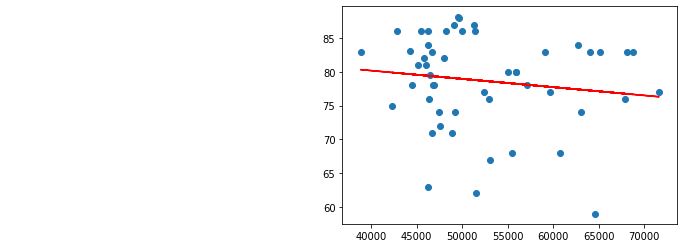

In [16]:
rat10 = gradvssal[2010]
r10 = gradvssal['Sal10']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r10,rat10)
regress_values10 = r10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r10,regress_values10,"r-")
plt.annotate(line_eq,(10,65),fontsize=15,color="red")
sc = plt.scatter(r10,rat10)
print(line_eq)
print(rvalue)
plt.show()


y = -0.0x + 86.15
-0.14382272873787422


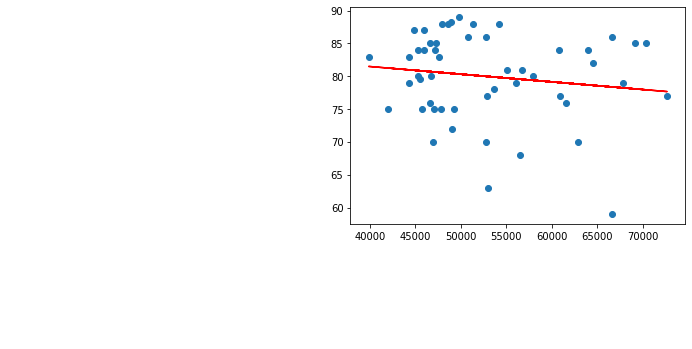

In [17]:
rat11 = gradvssal[2011]
r11 = gradvssal['Sal11']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r11,rat11)
regress_values11 = r11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r11,regress_values11,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.scatter(r11,rat11)
print(line_eq)
print(rvalue)
plt.show()

y = -0.0x + 87.09
-0.15647566716862757


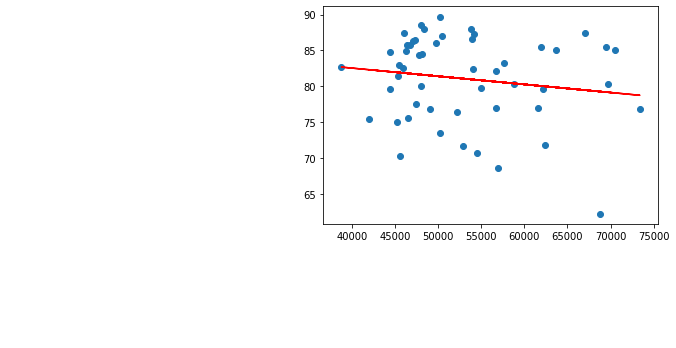

In [18]:
rat12 = gradvssal[2012]
r12 = gradvssal['Sal12']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r12,rat12)
regress_values12 = r12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r12,regress_values12,"r-")
plt.annotate(line_eq,(65,45),fontsize=15,color="red")
plt.scatter(r12,rat12)
print(line_eq)
print(rvalue)
plt.show()

y = -0.0x + 86.96
-0.16738086974534136


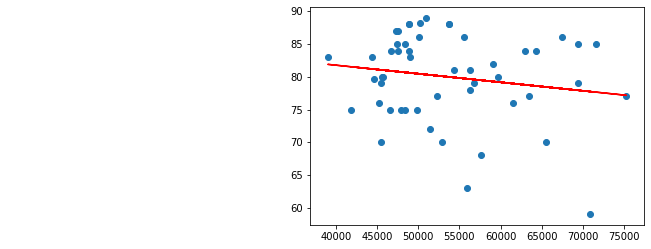

In [19]:
rat13 = gradvssal[2013]
r13 = gradvssal['Sal13']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r13,rat13)
regress_values13 = r13 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r13,regress_values13,"r-")
plt.annotate(line_eq,(65,60),fontsize=15,color="red")
plt.scatter(r13,rat13)
print(line_eq)
print(rvalue)
plt.show()

y = -0.0x + 86.19
-0.09804847617019216


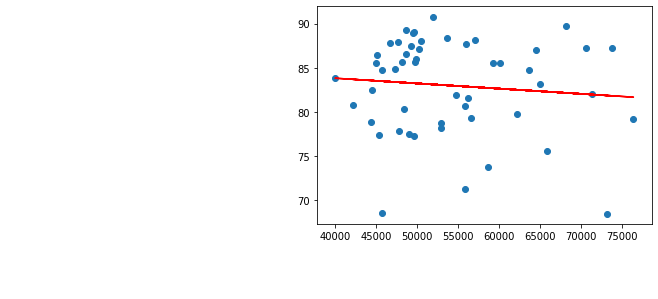

In [20]:
rat14 = gradvssal[2014]
r14 = gradvssal['Sal14']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r14,rat14)
regress_values14 = r14* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r14,regress_values14,"r-")
plt.annotate(line_eq,(65,60),fontsize=15,color="red")
plt.scatter(r14,rat14)
print(line_eq)
print(rvalue)
plt.show()

y = -0.0x + 88.02
-0.1416378534754649


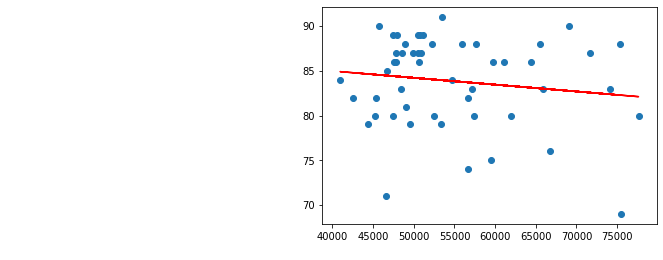

In [21]:
rat15 = gradvssal[2015]
r15 = gradvssal['Sal15']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r15,rat15)
regress_values15 = r15 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r15,regress_values15,"r-")
plt.annotate(line_eq,(15,65),fontsize=15,color="red")
plt.scatter(r15,rat15)
print(line_eq)
print(rvalue)
plt.show()

y = -0.0x + 86.04
-0.05331469963238596


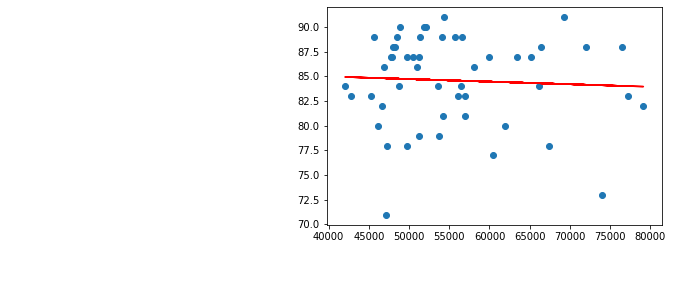

In [22]:
rat16 = gradvssal[2016]
r16 = gradvssal['Sal16']
st = gradvssal['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r16,rat16)
regress_values16 = r16 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r16,regress_values16,"r-")
plt.annotate(line_eq,(15,65),fontsize=15,color="red")
plt.scatter(r16,rat16)
print(line_eq)
print(rvalue)
plt.show()

In [23]:
gradrate2 = gradrate2.T
salaries2 = salaries2.T

In [24]:
salaries2

,Sal10,Sal11,Sal12,Sal13,Sal14,Sal15,Sal16
States,,,,,,,
Alabama,47571.000000,47803.000000,48003.000000,47949.000000,48720.0,48611.0,48518.0
Alaska,60732.000000,62918.000000,62425.000000,65468.000000,65891.0,66755.0,67443.0
Arizona,46952.000000,46637.000000,45193.000000,45264.000000,45335.0,47456.0,47218.0
Arkansas,46045.000000,45998.000000,46314.000000,46631.000000,47319.0,47823.0,48218.0
California,67932.000000,67871.000000,69755.344098,69435.000000,71396.0,74090.0,77179.0
Colorado,49181.000000,49228.000000,49049.000000,49843.700000,49615.0,44421.0,51233.0
Connecticut,68096.000000,69165.000000,69465.000000,69397.000000,70583.0,71709.0,72013.0
Delaware,57080.000000,57933.532710,58799.828527,59679.078299,59305.0,59707.0,59960.0
District of Columbia,64547.544109,66601.126126,68720.042915,70906.373104,73162.0,75490.0,73991.0


-0.13634122401639534


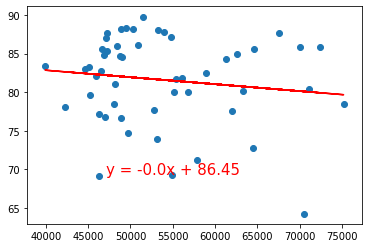

In [25]:
gradrate2['Agg'] = gradrate2.mean(axis=1)
salaries2['Agg']=salaries2.mean(axis=1)
ya = gradrate2['Agg']
xa = salaries2['Agg']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xa,ya)
regress_valuesA = xa * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xa,regress_valuesA,"r-")
plt.annotate(line_eq,(79,50),fontsize=15,color="red",xycoords='axes points')
plt.scatter(xa,ya)
print(rvalue)
plt.show()

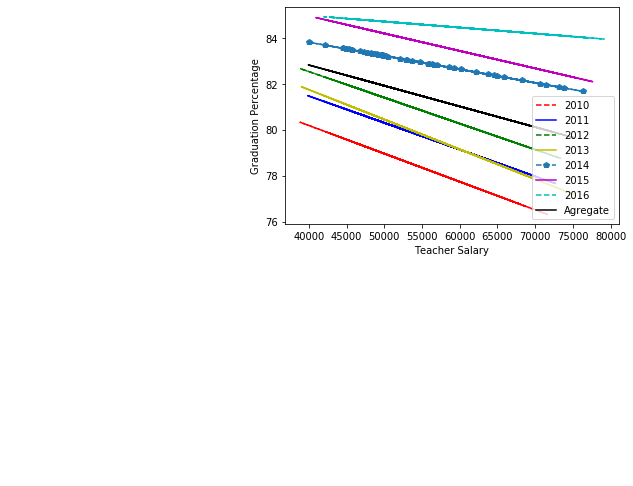

In [26]:
plt.plot(r10,regress_values10,"r-",linestyle='dashed', label="2010")
plt.plot(r11,regress_values11,"b-", label="2011")
plt.plot(r12,regress_values12,"g-", linestyle='dashed', label="2012")
plt.plot(r13,regress_values13,"y-", label="2013")
plt.plot(r14,regress_values14,"p-", linestyle='dashed', label="2014")
plt.plot(r15,regress_values15,"m-", label="2015")
plt.plot(r16,regress_values16,"c-", linestyle='dashed', label="2016")
plt.plot(xa,regress_valuesA,"k-", label="Agregate")
plt.annotate(line_eq,(15,65),fontsize=25,color="red")
plt.legend()
plt.xlabel('Teacher Salary')
plt.ylabel('Graduation Percentage')


plt.show()